## Q-Learning and Cartpole
In the following notebook q-learning is applied on cartpole and based on the results of q-learning for different episodes have been downprojected in to two-dimensional projection space. 

In [22]:
import gym
import numpy as np

# Create the CartPole environment
env = gym.make("CartPole-v1")

# Define hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 1000  # Number of episodes to train
n_bins = [20, 20, 20, 20]  # Number of bins for state space discretization

# Initialize the Q-table with all zeros
state_space_size = [n+1 for n in n_bins]
action_space_size = env.action_space.n
Q_table = np.zeros(state_space_size + [action_space_size])

# Define a function for discretizing the state
def discretize_state(state):
    state_indices = tuple(
        min(int((state[i] - env.observation_space.low[i]) / (env.observation_space.high[i] - env.observation_space.low[i]) * n_bins[i]), n_bins[i] - 1)
        for i in range(len(state))
    )
    return state_indices

# Initialize a list to collect the dataset
dataset = []

# Q-learning training
for episode in range(num_episodes):
    state = env.reset()
    done = False

    while not done:
        state_indices = discretize_state(state)

        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Random action
        else:
            action = np.argmax(Q_table[state_indices])

        # Take the selected action
        next_state, reward, done, _ = env.step(action)

        # Update the Q-value using the Q-learning update rule
        next_state_indices = discretize_state(next_state)
        Q_table[state_indices + (action,)] = (1 - alpha) * Q_table[state_indices + (action,)] + \
            alpha * (reward + gamma * np.max(Q_table[next_state_indices]))

        # Collect the state and action in the dataset
        dataset.append((state, action))

        state = next_state

# The Q-learning process is complete, and the dataset is collected
# You can use the 'dataset' list for further analysis or other purposes

# Print the Q-table if needed
print("Q-table:")
print(Q_table)


Q-table:
[[[[[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   ...

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]]


  [[[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   ...

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
   

/tmp/ipykernel_22867/782117483.py:22: RuntimeWarning: overflow encountered in scalar subtract
  min(int((state[i] - env.observation_space.low[i]) / (env.observation_space.high[i] - env.observation_space.low[i]) * n_bins[i]), n_bins[i] - 1)


/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


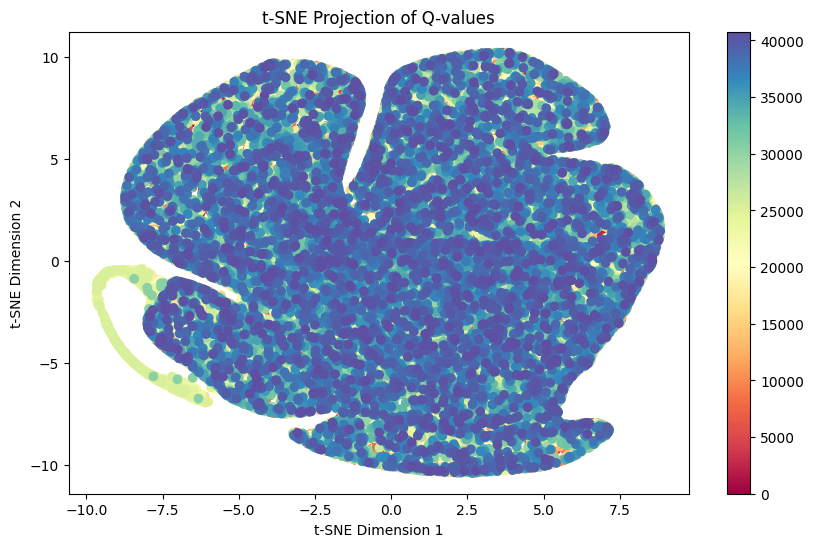

In [5]:
import gym
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create the CartPole environment
env = gym.make('CartPole-v1')

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 1000

# Define state discretization parameters
n_bins = (6, 12, 12, 24)  # Number of bins for each state variable
state_space_high = [env.observation_space.high[0], 0.5, env.observation_space.high[2], 0.5]
state_space_low = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -0.5]
state_space_bins = [np.linspace(low, high, num + 1) for low, high, num in zip(state_space_low, state_space_high, n_bins)]

# Initialize Q-table
action_space = env.action_space.n
observation_space = [bin_edges.shape[0] + 1 for bin_edges in state_space_bins]
Q = np.random.rand(*observation_space, action_space)

# Function to discretize the state
def discretize_state(state):
    state_indices = [np.digitize(s, bin_edges) for s, bin_edges in zip(state, state_space_bins)]
    return tuple(state_indices)

# Function to perform Q-learning
def q_learning(episodes):
    for episode in range(episodes):
        state = discretize_state(env.reset())
        done = False

        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])

            next_state, reward, done, _ = env.step(action)
            next_state = discretize_state(next_state)

            Q[state + (action,)] = Q[state + (action,)] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state + (action,)])

            state = next_state

    return Q

# Train the Q-learning agent
Q = q_learning(num_episodes)

# Project Q-values using t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
q_values_2d = tsne.fit_transform(Q.reshape(-1, action_space))

# Plot the t-SNE projection
plt.figure(figsize=(10, 6))
plt.scatter(q_values_2d[:, 0], q_values_2d[:, 1], c=np.arange(Q.size // action_space), cmap=plt.cm.Spectral)
plt.title('t-SNE Projection of Q-values')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()


/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


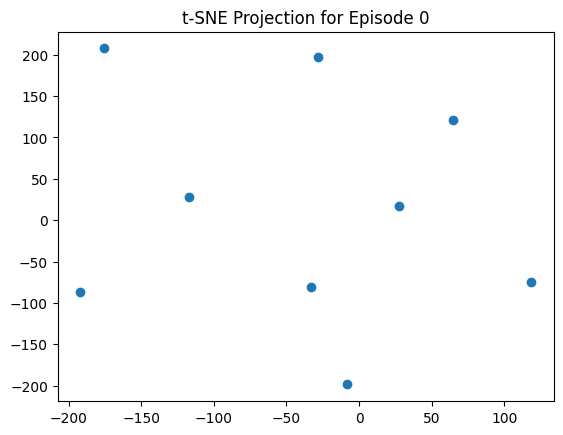

/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


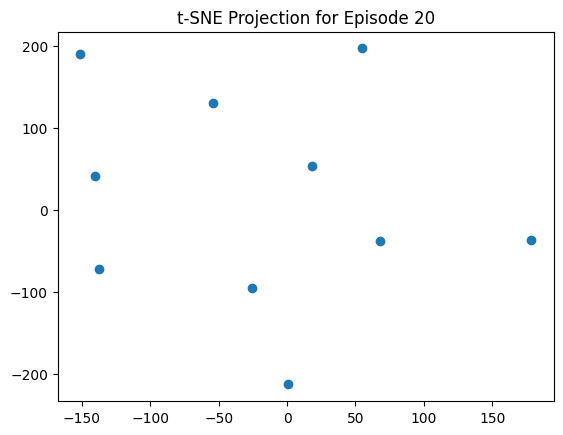

/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


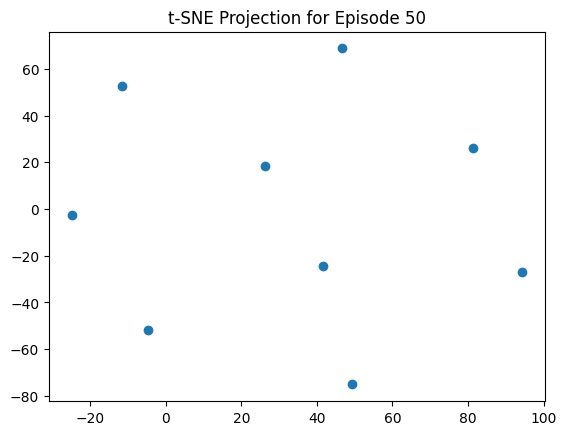

/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


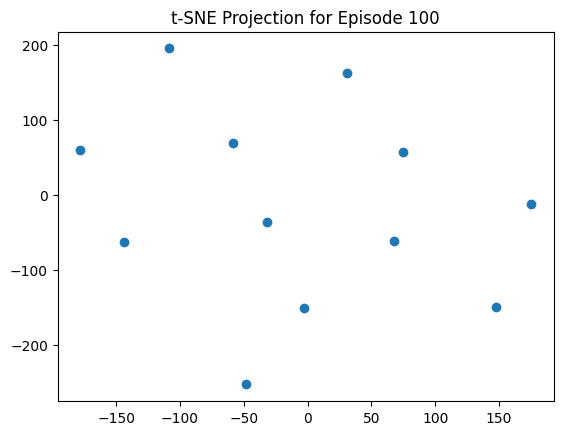

/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


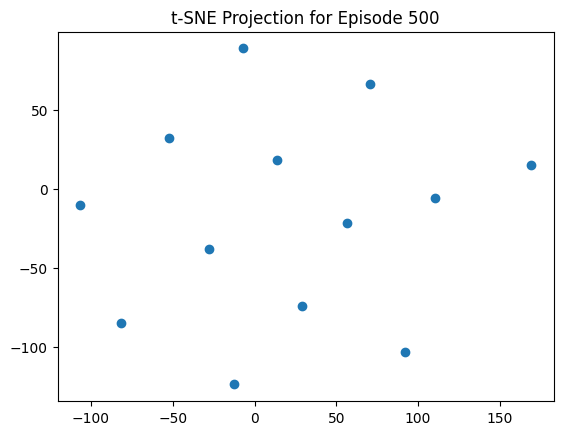

IndexError: list index out of range

In [21]:
import gym
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import math

# Q-learning parameters
num_episodes = 1000
learning_rate = 0.1
discount_factor = 0.99
epsilon = 0.1

# Create the CartPole environment
env = gym.make("CartPole-v1")

# Initialize the Q-table
num_states = [20, 20, 20, 20]  # Discretization of state space
num_actions = env.action_space.n
q_table = np.zeros(num_states + [num_actions])

def discretize_state(state):
    state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
    state_bounds[1] = [-0.5, 0.5]
    state_bounds[3] = [-math.radians(50), math.radians(50)]
    state_scaling = [(num_states[i] - 1) / (state_bounds[i][1] - state_bounds[i][0]) for i in range(4)]
    state_offset = [-state_bounds[i][0] * state_scaling[i] for i in range(4)]
    discretized_state = [int((state[i] - state_bounds[i][0]) * state_scaling[i] + state_offset[i]) for i in range(4)]
    # Ensure the discretized state is within bounds
    discretized_state = [min(max(0, x), num_states[i] - 1) for i, x in enumerate(discretized_state)]
    return tuple(discretized_state)

# Perform Q-learning
def q_learning(num_episodes, learning_rate, discount_factor, epsilon):
    q_values_data = []

    for episode in range(num_episodes):
        state = env.reset()
        state = discretize_state(state)
        done = False
        episode_q_values = []

        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()  # Exploration
            else:
                action = np.argmax(q_table[state])  # Exploitation

            next_state, reward, done, _ = env.step(action)
            next_state = discretize_state(next_state)

            # Q-learning update
            q_table[state][action] = (1 - learning_rate) * q_table[state][action] + learning_rate * (
                reward + discount_factor * np.max(q_table[next_state])
            )

            episode_q_values.append(q_table[state].copy())
            state = next_state

        q_values_data.append(episode_q_values)

    return q_values_data

# Train the Q-learning agent
q_values_data = q_learning(num_episodes, learning_rate, discount_factor, epsilon)

# Visualize the Q-values using t-SNE
def visualize_tsne(q_values_data, episode_numbers):
    for episode_number in episode_numbers:
        q_values = q_values_data[episode_number]
        
        # Reduce perplexity to be less than the number of Q-values
        perplexity = min(30, len(q_values) - 1)  # Adjust as needed

        tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300, random_state=42)
        q_values_2d = tsne.fit_transform(np.array(q_values))

        # Plot the 2D t-SNE projection
        plt.figure()
        plt.scatter(q_values_2d[:, 0], q_values_2d[:, 1])
        plt.title(f"t-SNE Projection for Episode {episode_number}")
        plt.show()

# Choose episodes to visualize
episode_numbers_to_visualize = [0, 20, 50, 100, 500, 1000]

# Call the visualization function
visualize_tsne(q_values_data, episode_numbers_to_visualize)



/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


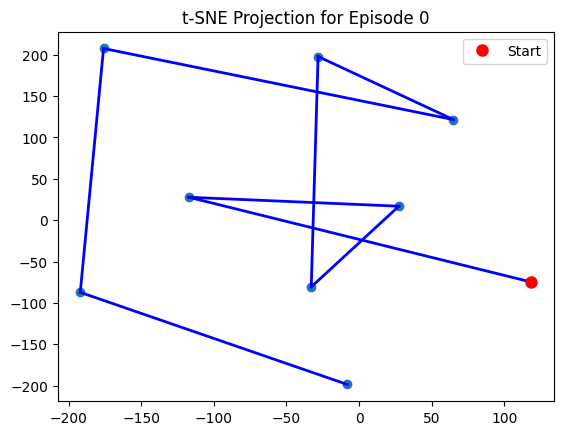

/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


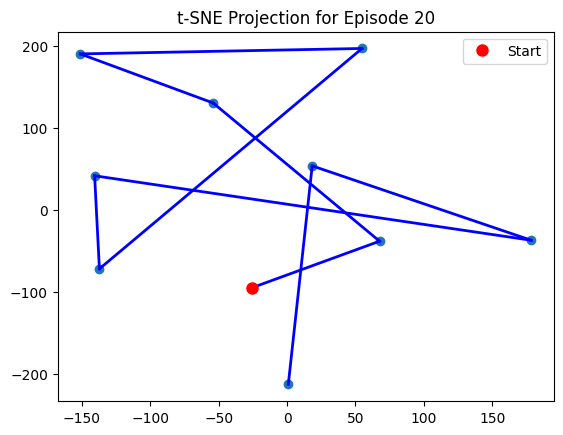

/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


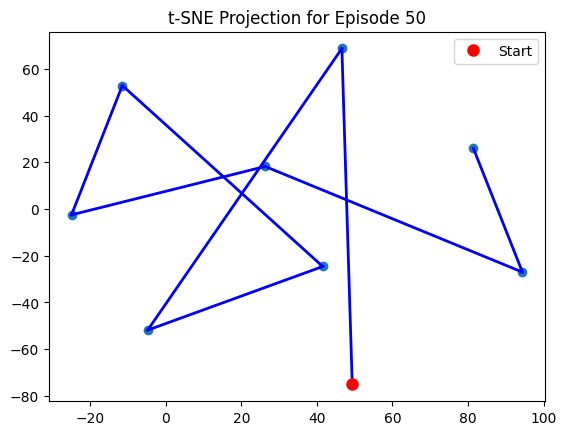

/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


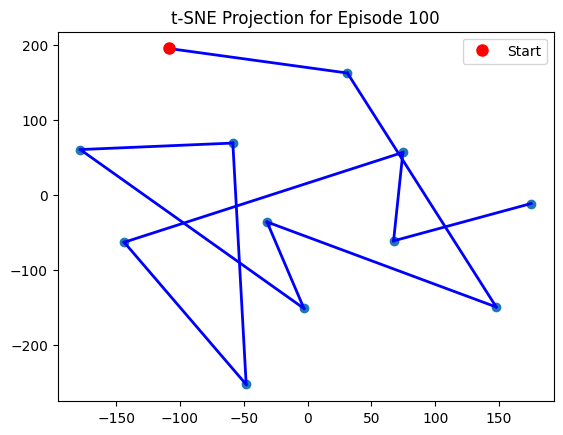

/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


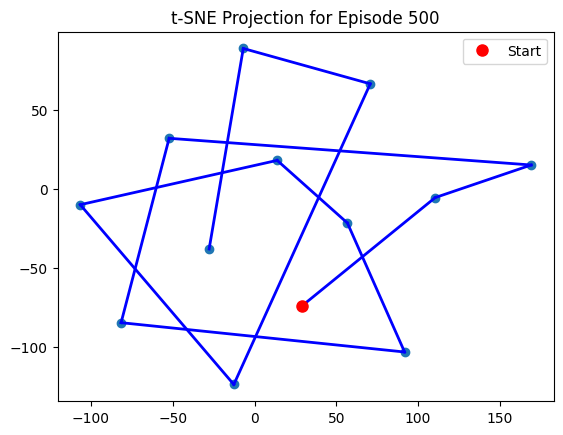

IndexError: list index out of range

In [24]:
# Visualize the Q-values using t-SNE and connect actions with lines
def visualize_tsne(q_values_data, episode_numbers):
    for episode_number in episode_numbers:
        q_values = q_values_data[episode_number]
        
        # Set perplexity based on the number of samples (Q-values)
        perplexity = min(30, len(q_values) - 1)  # Adjust as needed

        tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300, random_state=42)
        q_values_2d = tsne.fit_transform(np.array(q_values))

        actions = np.argmax(q_values, axis=1)  # Get the action with the highest Q-value for each state

        # Plot the 2D t-SNE projection
        plt.figure()
        plt.scatter(q_values_2d[:, 0], q_values_2d[:, 1])
        plt.title(f"t-SNE Projection for Episode {episode_number}")

        # Connect actions with lines
        for i in range(1, len(q_values_2d)):
            plt.plot([q_values_2d[i-1, 0], q_values_2d[i, 0]], [q_values_2d[i-1, 1], q_values_2d[i, 1]], 'b-', lw=2)

        # Mark the starting point with a red dot
        plt.plot(q_values_2d[0, 0], q_values_2d[0, 1], 'ro', markersize=8, label='Start')
        plt.legend()

        plt.show()


# Choose episodes to visualize
episode_numbers_to_visualize = [0, 20, 50, 100, 500, 1000]

# Call the visualization function
visualize_tsne(q_values_data, episode_numbers_to_visualize)

/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_30479/3399418835.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_30479/3399418835.py:26: User

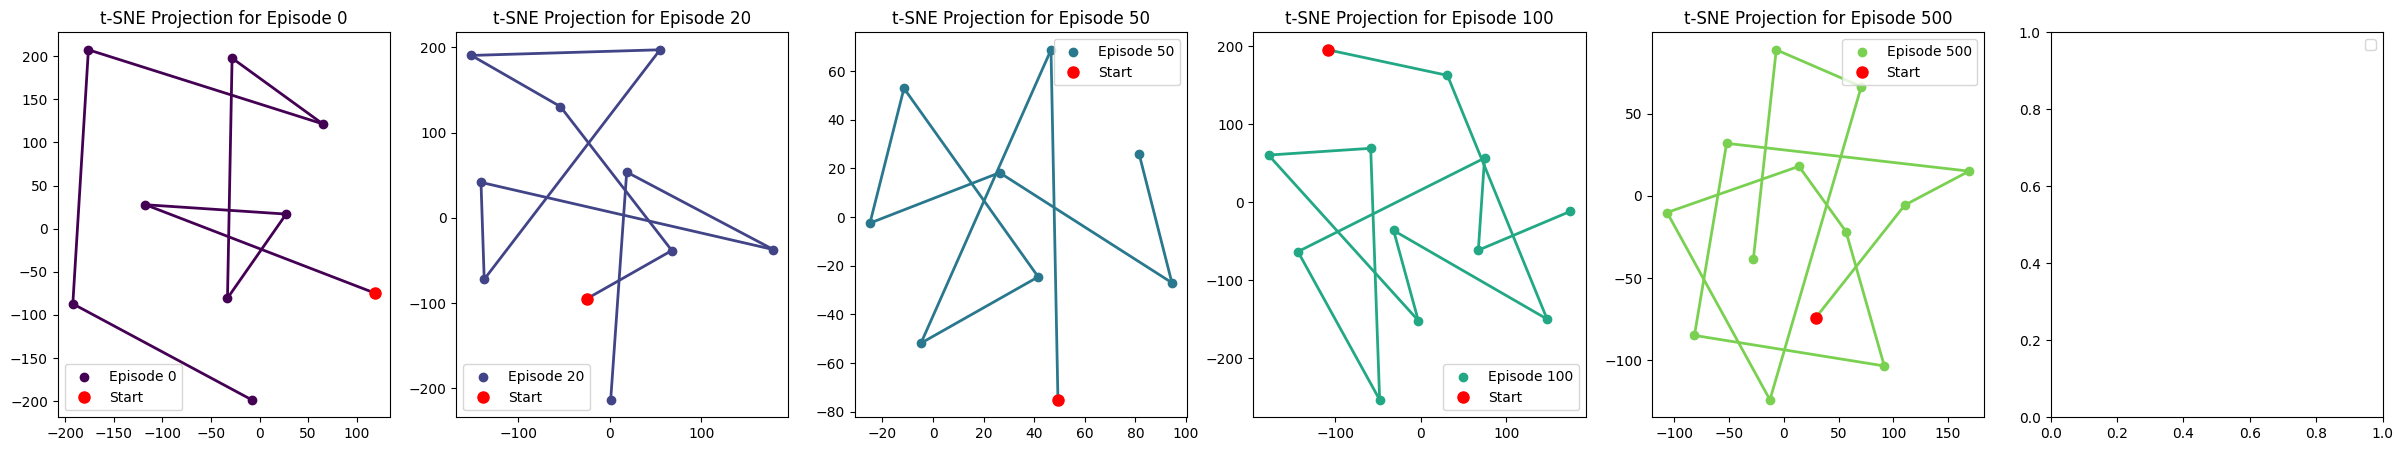

In [26]:
# Visualize the Q-values using t-SNE and connect actions with lines
def visualize_tsne(q_values_data, episode_numbers):
    num_subplots = len(episode_numbers)
    num_colors = num_subplots
    colors = plt.cm.viridis(np.linspace(0, 1, num_colors))  # Use a colormap to get distinct colors

    fig, axes = plt.subplots(1, num_subplots, figsize=(5 * num_subplots, 5))
    for i, episode_number in enumerate(episode_numbers):
        if episode_number < len(q_values_data):
            q_values = q_values_data[episode_number]

            # Set perplexity based on the number of samples (Q-values)
            perplexity = min(30, len(q_values) - 1)  # Adjust as needed

            tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300, random_state=42)
            q_values_2d = tsne.fit_transform(np.array(q_values))

            actions = np.argmax(q_values, axis=1)  # Get the action with the highest Q-value for each state

            ax = axes[i]
            ax.scatter(q_values_2d[:, 0], q_values_2d[:, 1], color=colors[i], label=f"Episode {episode_number}")
            ax.set_title(f"t-SNE Projection for Episode {episode_number}")

            # Connect actions with lines
            for j in range(1, len(q_values_2d)):
                ax.plot(
                    [q_values_2d[j-1, 0], q_values_2d[j, 0]],
                    [q_values_2d[j-1, 1], q_values_2d[j, 1]],
                    'b-',
                    lw=2,
                    color=colors[i]
                )

            # Mark the starting point with a red dot
            ax.plot(q_values_2d[0, 0], q_values_2d[0, 1], 'ro', markersize=8, label='Start')

    for ax in axes:
        ax.legend()

    plt.show()

# Choose episodes to visualize
episode_numbers_to_visualize = [0, 20, 50, 100, 500, 1000]

# Call the visualization function
visualize_tsne(q_values_data, episode_numbers_to_visualize)


/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_30479/367974854.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_30479/367974854.py:26: UserWa

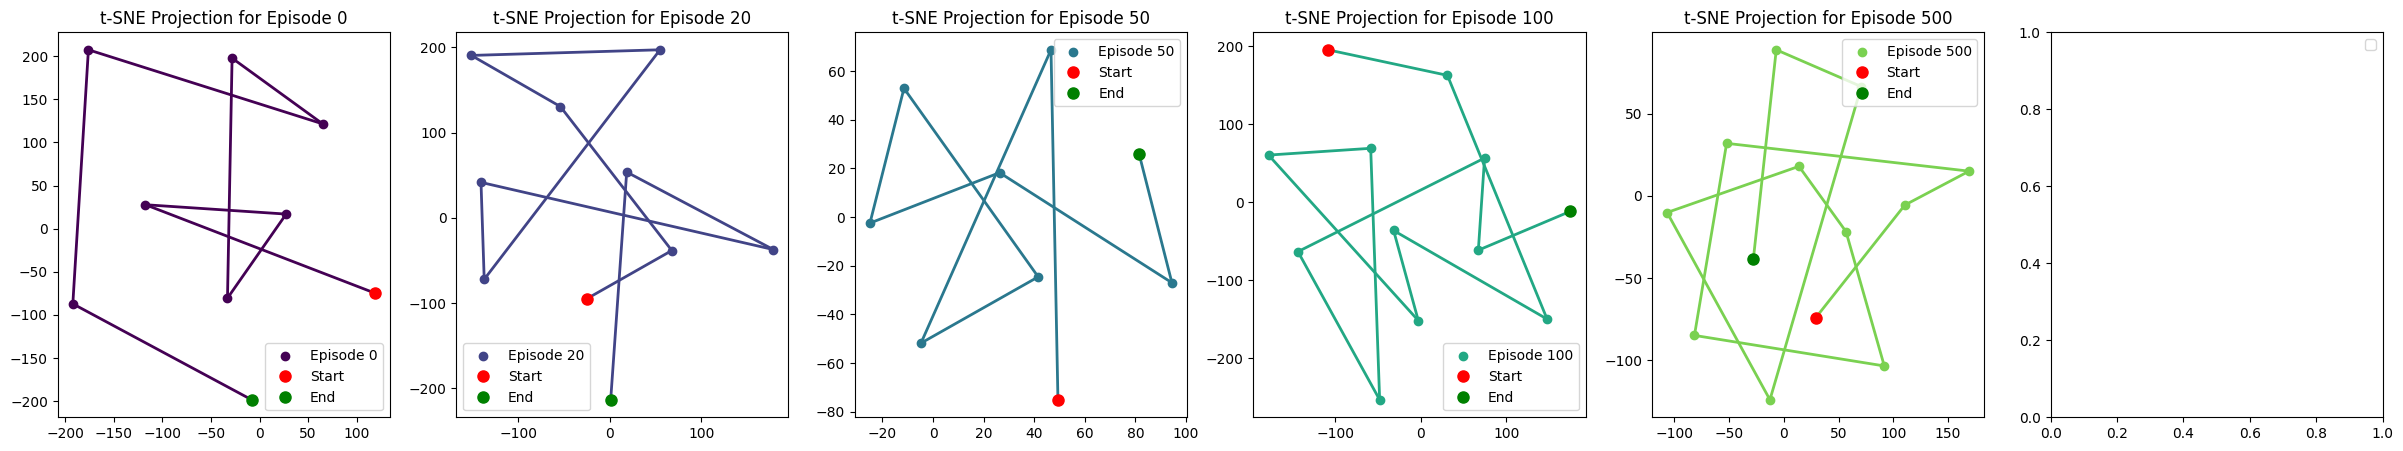

In [27]:
# Visualize the Q-values using t-SNE and connect actions with lines
def visualize_tsne(q_values_data, episode_numbers):
    num_subplots = len(episode_numbers)
    num_colors = num_subplots
    colors = plt.cm.viridis(np.linspace(0, 1, num_colors))  # Use a colormap to get distinct colors

    fig, axes = plt.subplots(1, num_subplots, figsize=(5 * num_subplots, 5))
    for i, episode_number in enumerate(episode_numbers):
        if episode_number < len(q_values_data):
            q_values = q_values_data[episode_number]

            # Set perplexity based on the number of samples (Q-values)
            perplexity = min(30, len(q_values) - 1)  # Adjust as needed

            tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300, random_state=42)
            q_values_2d = tsne.fit_transform(np.array(q_values))

            actions = np.argmax(q_values, axis=1)  # Get the action with the highest Q-value for each state

            ax = axes[i]
            ax.scatter(q_values_2d[:, 0], q_values_2d[:, 1], color=colors[i], label=f"Episode {episode_number}")
            ax.set_title(f"t-SNE Projection for Episode {episode_number}")

            # Connect actions with lines
            for j in range(1, len(q_values_2d)):
                ax.plot(
                    [q_values_2d[j-1, 0], q_values_2d[j, 0]],
                    [q_values_2d[j-1, 1], q_values_2d[j, 1]],
                    'b-',
                    lw=2,
                    color=colors[i]
                )

            # Mark the starting point with a red dot
            ax.plot(q_values_2d[0, 0], q_values_2d[0, 1], 'ro', markersize=8, label='Start')

            # Mark the end of the episode with a green dot
            ax.plot(q_values_2d[-1, 0], q_values_2d[-1, 1], 'go', markersize=8, label='End')

    for ax in axes:
        ax.legend()

    plt.show()

# Choose episodes to visualize
episode_numbers_to_visualize = [0, 20, 50, 100, 500, 1000]

# Call the visualization function
visualize_tsne(q_values_data, episode_numbers_to_visualize)


We see that the projection of TSNE for the episodes have different value in their projections of the x and y axis. T-SNE projection for episode 500 has their values in x axis in narrower than T-SNE projection for episode 20. The same argument can be made for the y-axis of the particular projections.

/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_30479/2987824261.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_30479/2987824261.py:27: User

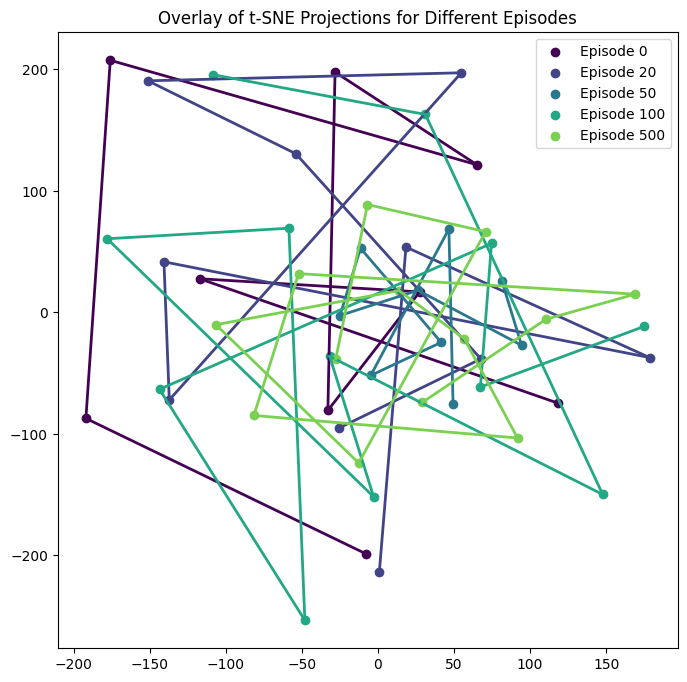

In [28]:
# Visualize the Q-values using t-SNE and connect actions with lines
def visualize_tsne(q_values_data, episode_numbers):
    fig, ax = plt.subplots(figsize=(8, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(episode_numbers)))  # Use a colormap to get distinct colors

    for i, episode_number in enumerate(episode_numbers):
        if episode_number < len(q_values_data):
            q_values = q_values_data[episode_number]

            # Set perplexity based on the number of samples (Q-values)
            perplexity = min(30, len(q_values) - 1)  # Adjust as needed

            tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300, random_state=42)
            q_values_2d = tsne.fit_transform(np.array(q_values))

            actions = np.argmax(q_values, axis=1)  # Get the action with the highest Q-value for each state

            ax.scatter(
                q_values_2d[:, 0],
                q_values_2d[:, 1],
                color=colors[i],
                label=f"Episode {episode_number}",
            )

            # Connect actions with lines
            for j in range(1, len(q_values_2d)):
                ax.plot(
                    [q_values_2d[j-1, 0], q_values_2d[j, 0]],
                    [q_values_2d[j-1, 1], q_values_2d[j, 1]],
                    'b-',
                    lw=2,
                    color=colors[i]
                )

    ax.set_title("Overlay of t-SNE Projections for Different Episodes")
    ax.legend()
    plt.show()

# Choose episodes to visualize
episode_numbers_to_visualize = [0, 20, 50, 100, 500, 1000]

# Call the visualization function
visualize_tsne(q_values_data, episode_numbers_to_visualize)


/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_30479/4242567506.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_30479/4242567506.py:27: User

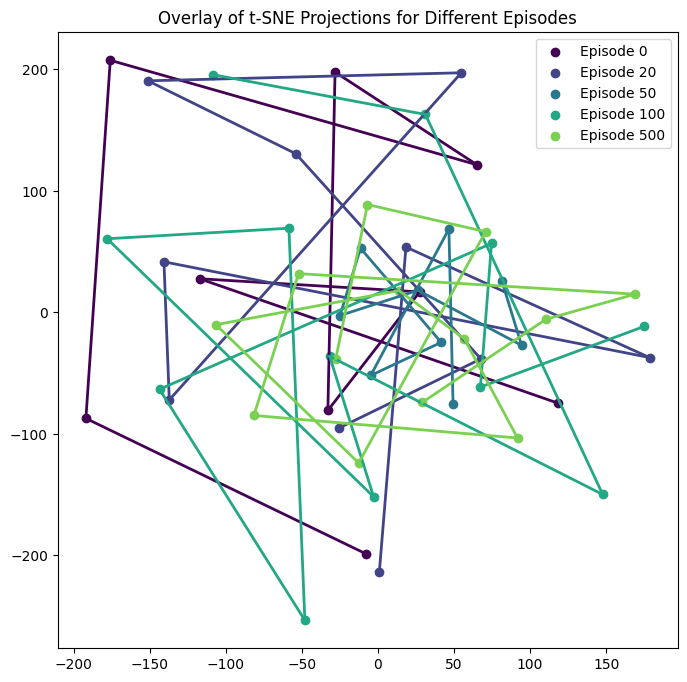

In [33]:
# Visualize the Q-values using t-SNE and connect actions with lines
def visualize_tsne(q_values_data, episode_numbers):
    fig, ax = plt.subplots(figsize=(8, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(episode_numbers)))  # Use a colormap to get distinct colors

    for i, episode_number in enumerate(episode_numbers):
        if episode_number < len(q_values_data):
            q_values = q_values_data[episode_number]

            # Set perplexity based on the number of samples (Q-values)
            perplexity = min(30, len(q_values) - 1)  # Adjust as needed

            tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300, random_state=42)
            q_values_2d = tsne.fit_transform(np.array(q_values))

            actions = np.argmax(q_values, axis=1)  # Get the action with the highest Q-value for each state

            ax.scatter(
                q_values_2d[:, 0],
                q_values_2d[:, 1],
                color=colors[i],
                label=f"Episode {episode_number}",
            )

            # Connect actions with lines
            for j in range(1, len(q_values_2d)):
                ax.plot(
                    [q_values_2d[j-1, 0], q_values_2d[j, 0]],
                    [q_values_2d[j-1, 1], q_values_2d[j, 1]],
                    'b-',
                    lw=2,
                    color=colors[i]
                )

    ax.set_title("Overlay of t-SNE Projections for Different Episodes")
    ax.legend()

    # Add the 1000th episode
    episode_number_1000 = 1000
    if episode_number_1000 < len(q_values_data):
        q_values_1000 = q_values_data[episode_number_1000]
        tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
        q_values_2d_1000 = tsne.fit_transform(np.array(q_values_1000))
        ax.scatter(
            q_values_2d_1000[:, 0],
            q_values_2d_1000[:, 1],
            color='red',
            label=f"Episode {episode_number_1000}",
        )
        for j in range(1, len(q_values_2d_1000)):
            ax.plot(
                [q_values_2d_1000[j-1, 0], q_values_2d_1000[j, 0]],
                [q_values_2d_1000[j-1, 1], q_values_2d_1000[j, 1]],
                'b-',
                lw=2,
                color='red'
            )

    plt.show()

# Choose episodes to visualize, including the 1000th episode
episode_numbers_to_visualize = [0, 20, 50, 100, 500, 1000]

# Call the visualization function
visualize_tsne(q_values_data, episode_numbers_to_visualize)


In [10]:
import pandas as pd
df_snapshots = pd.DataFrame(tsne_result, columns=['t-SNE 1st Dimension', 't-SNE 2st Dimension'])


In [13]:
import altair as alt
from altair import datum
alt.data_transformers.disable_max_rows()
alt.Chart(df_snapshots).mark_point(
    opacity=0.6
).encode(
    x='t-SNE 1st Dimension',
    y='t-SNE 2st Dimension',
    color='line:N',
    shape='cp:N'
).properties(
    width=700,
    height=700,
    title="Cartpole"
).interactive()

alt.Chart(...)

/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


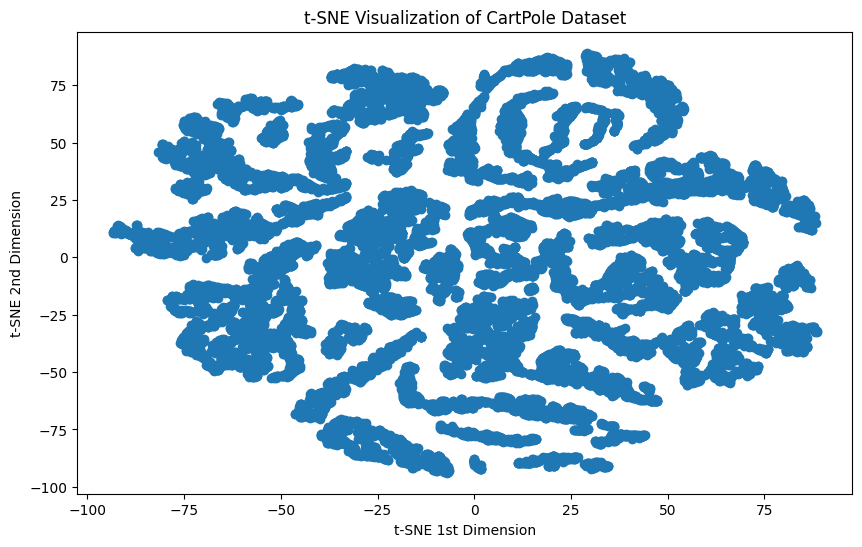

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'dataset' contains the state-action pairs
states = [state for state, _ in dataset]

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(states)

# Ensure perplexity is less than the number of samples
perplexity = min(30, len(dataset) - 1)  # Set a reasonable value for perplexity

# Apply t-SNE for further dimensionality reduction to 2D
tsne = TSNE(n_components=2, perplexity=perplexity)
tsne_result = tsne.fit_transform(pca_result)

# Scatter plot of the results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.xlabel('t-SNE 1st Dimension')
plt.ylabel('t-SNE 2nd Dimension')
plt.title('t-SNE Visualization of CartPole Dataset')
plt.show()

/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hiki/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


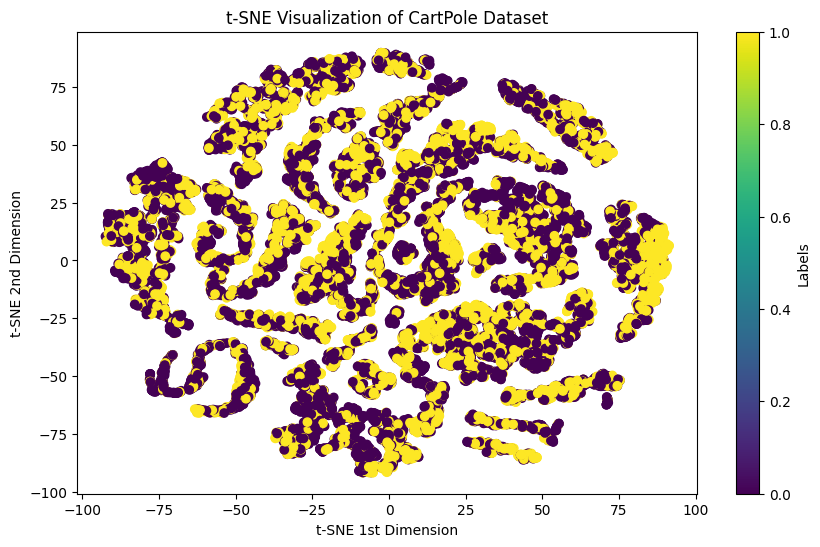

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'dataset' contains the state-action pairs and 'labels' contains the labels or categories for each data point
states = [state for state, _ in dataset]
labels = [label for _, label in dataset]

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(states)

# Apply t-SNE for further dimensionality reduction to 2D
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(pca_result)

# Scatter plot of the results with different colors based on labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap=plt.cm.get_cmap('viridis'))
plt.xlabel('t-SNE 1st Dimension')
plt.ylabel('t-SNE 2nd Dimension')
plt.title('t-SNE Visualization of CartPole Dataset')

# Add a colorbar to show the color-label mapping
plt.colorbar(scatter, label='Labels')

plt.show()
